In [1]:
# Importing the relevant packages
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train = x_train / 255

x_test = x_test / 255

In [9]:
y_train.shape

(50000, 1)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train,10)

In [13]:
y_cat_test = to_categorical(y_test,10)

In [14]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

In [18]:
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3783 - accuracy: 0.5074 - val_loss: 1.1896 - val_accuracy: 0.5772
Epoch 2/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1106 - accuracy: 0.6083 - val_loss: 1.0871 - val_accuracy: 0.6175
Epoch 3/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9714 - accuracy: 0.6593 - val_loss: 0.9814 - val_accuracy: 0.6606
Epoch 4/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8620 - accuracy: 0.6984 - val_loss: 0.9596 - val_accuracy: 0.6711
Epoch 5/15
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7769 - accuracy: 0.7291 - val_loss: 0.9603 - val_accuracy: 0.6721
Epoch 6/15
1563/1563 [==============================] - 60s 38ms/step - loss: 0.6983 - accuracy: 0.7588 - val_loss: 0.9169 - val_accuracy: 0.6899
Epoch 7/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6282 - accuracy: 0.7793 - val_loss: 0.9733 -

In [24]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

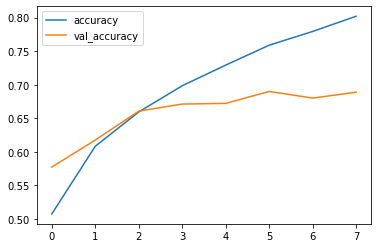

In [28]:
metrics[['accuracy', 'val_accuracy']].plot()

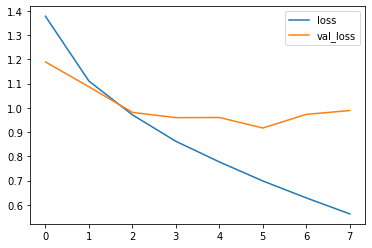

In [30]:
metrics[['loss','val_loss']].plot()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1000
           1       0.82      0.80      0.81      1000
           2       0.57      0.58      0.58      1000
           3       0.54      0.46      0.49      1000
           4       0.68      0.56      0.62      1000
           5       0.61      0.59      0.60      1000
           6       0.68      0.85      0.75      1000
           7       0.76      0.73      0.74      1000
           8       0.76      0.81      0.78      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

